# Lab8 Optimization Methods
**Daniel Leskiewicz**

## Introduction
 - Within this lab we implement iterative numerical optimizaiton. We applied the gradient descent algorithm also along side an optimizer function to find the best parameters to get the global/local minima. This then allowed us see how the algorithm tries different parameters to get to the "lowest" point within a derivative, or the darkest part if we are looking at heatmaps. We also used the gaussian dataset to find the optimized parameters for the mu and sigma variables.


## Questions
1. Reflect on the form and organization of our optimizer API. Specifically, discuss each of  the methods and what role they serve. This discussion should include what arguments  they accept, what the method returns, and why we might choose to separate out these  specific methods into helper methods.
 - Well to start with the init constructor we declare the step_size, max_iterations, tol, and the delta which is h for moving along the derivative. The gradient method is the same method used in the previous lab but is a method that calculates the gradient with the current parameters so we know how much to adjust these parameters. The calculate_change takes the new parameters and the old parameters and calculates the difference, the change will be stopped if it gets below and certain threshold. The update method bascially calculates the new parameters by the step_size and gradient. Finally, the optimize method puts all of the methods mentioned together to return the best/optimized parameters.

2. For experiment 1:  

 i. how many optima did you find? Hint: Discuss the significance of places where  the derivative is equal to 0.
 - Well, there is 1 optima but there are 2 places where the derivative equals 0. There is only one place where we find the minima. The importance of the dervative to equal 0 is to find where the local minima and maxima of the funciton.


 ii. When you used the optimizer you started at x = 0. How many optima did your optimizer return? Was it a minima or maxima? Was it a global or local optima?By looking at the gradient descent algorithm find what term pointed you toward 
the minimum. Describe how it did this. Can you think of a way to find the function’s maxima?
 - Well, the optimizer returned 1 optima, the is the minima of the function because we can see that from the starting point to the ending point it was going down the slope which means the value was going negative and stopped when the value start going positive. The gradient descent algorithm "walked" us towards the minima which was the gradient. The sign of the gradient tells us to move in a specific direction where are going. The functions maxima if we wanted to find it, we would change the code within the update method to instead of subtracting we would add.


3. For experiment 2:


 i. how many optima did you find? 
 - I found 2 optima within experiment 2.

 ii. Describe the different starting locations that you used to solve for optima. Was  the found optima different for any of these starting locations and were they the  global or local optima? If it was, can you explain why the optimizer found  different solutions?
 - While using these starting positions, I found the global minima because these two points are the only two points where the function is at its lowest state and the rest of the function on both ends increase positively. The left point of the function is the local minima because the point on the right is the global minima. The optimizer method follows the slope of the function downhill and once it reaches zero or near zero then it stops.

4. For experiment 3: 
 
 i. how many optima did you find? 
   - Looking at the last plot, I found 1 optima
 

 ii. Look back at the heatmaps you generated in Lab06 for the gaussian distribution.  Describe what the optimizer is doing using the heatmap visualization.
 - The optimizer shows how the heatmaps show moving towards the areas of lower heat in a sense. The darker the area the lower the error so we can see if we are moving a specific direction down the derivative we can determine the error by just the heat areas on the heatmap.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cost_functions import GaussianCostFunction
from test_optim import *
from optim import Optimizer

## Testing Implemenation of Optimizer

In [2]:
!python test_optim.py

......
----------------------------------------------------------------------
Ran 6 tests in 0.001s

OK


## Experiment 1: Cubic Model
$$ f(x) = x^3-3x^2-144x+432 $$
$$ f'(x) = 3x^2-6x-144 $$

### F(x) function

In [3]:
def f_function(x):
    return (x**3)-(3*(x**2))-(144*x)+432

### F(x) prime Function

In [4]:
def f_prime_function(x):
    return (3*(x**2)) - (6*x)- 144

### 1. Plot the cost function above within the bounds of -15 <= x <= 18 with a step size of 0.01.

Text(0, 0.5, 'Y')

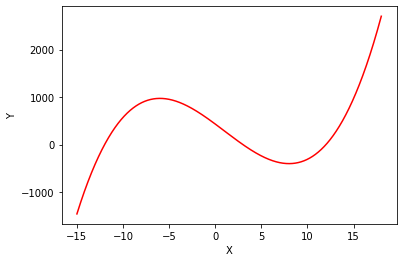

In [5]:
x_value = np.linspace(-15,18,3301)
plt.plot(x_value, f_function(x_value), c='r')
plt.xlabel('X')
plt.ylabel('Y')

### 2. Plotting the numerical derivative of the cubc model

Text(0, 0.5, 'Y')

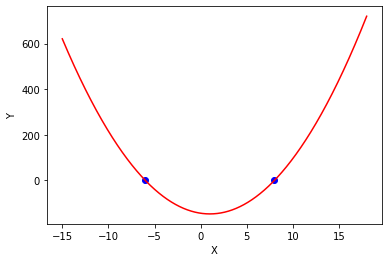

In [6]:
x_l = x_value[:len(x_value)//2]
x_r = x_value[len(x_value)//2:]
low_value_l = x_l[np.abs(f_prime_function(x_l)).argmin()]
low_value_r = x_r[np.abs(f_prime_function(x_r)).argmin()]
plt.plot((x_value), f_prime_function(x_value), c='r')
plt.scatter(low_value_l, f_prime_function(low_value_l), c='b')
plt.scatter(low_value_r, f_prime_function(low_value_r), c='b')
plt.xlabel('X')
plt.ylabel('Y')

### 3. Create a new objective function class

In [7]:
class CubicModelCostFunction:
    def cost(self, parameters):
        x = parameters[0]
        return (x**3) - (3*(x**2))-(144*x)+432

### 4. Import your optim classes, create the object with it, and supply the cost function that you wrote

In [8]:
optimizer = Optimizer(0.01, 100, .00001, .0001)
cost_object = CubicModelCostFunction()
starting_parameters = np.array([0.])
optimized_p, iterations = optimizer.optimize(cost_object, np.array([0.]))
print("Found parameters : " + str(optimized_p) + " " + "Iterations: " + str(iterations))

Found parameters : [7.99993677] Iterations: 27


### 5. Using a start point of 0, solve for the minimum using your optimizer. Plot a line from this starting point to the minima on your objective function plot.

Text(0, 0.5, 'Y')

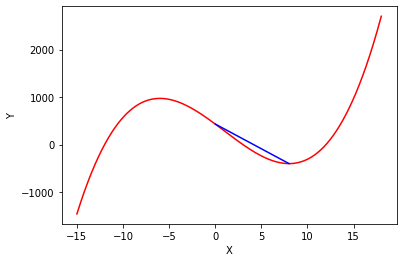

In [9]:
plt.plot(x_value, f_function(x_value), c='r')
plt.plot(np.array([0, 7.99993677]), np.array([f_function(0), f_function(7.99993677)]), c='b')
plt.xlabel('X')
plt.ylabel('Y')

## Experiment 2: Quartic Model
$$ f(x) = 3x^4-16x^3-18x^2 $$
$$ f'(x) = 12x^3-48x^2-36x $$

In [10]:
def f_function(x):
    return (3*(x**4)) - (16*(x**3)) - (18*(x**2))

def f_prime_function(x):
    return (12*(x**3)) - (48*(x**2)) - 36*x

### 1. Plot the cost function above within the bounds of -3 <= x < 6.75 with step size of 0.1.

Text(0, 0.5, 'Y')

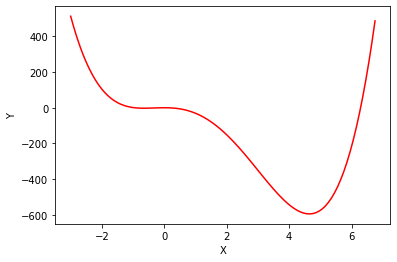

In [11]:
x_value = np.linspace(-3,6.75,99)
plt.plot(x_value, f_function(x_value), c='r')
plt.xlabel('X')
plt.ylabel('Y')

### 2. Plot the numerical derivative of the quartic model within the same bounds and step size

Text(0, 0.5, 'Y')

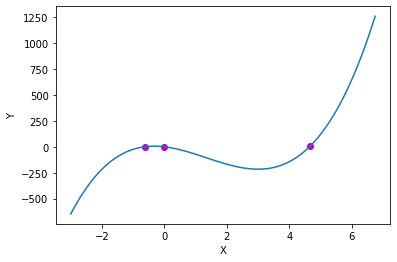

In [75]:
l = np.take(np.argsort(np.abs(f_prime_function(x_value))), [0,1,6])
plt.plot(x_value, f_prime_function(x_value))
plt.scatter(x_value[l], f_prime_function(x_value[l]), c='m')
plt.xlabel('X')
plt.ylabel('Y')

### 3. Create a new objective function class. 

In [76]:
class QuarticModelCostFunction:
     def cost(self, parameters):
        x = parameters[0]
        return (3*(x**4)) - (16*(x**3)) - (18*(x**2))

### 4. Instantiate a new object with your optim class and supply the cost function that your wrote.

In [79]:
optimizer = Optimizer(0.001, 1000, .00001, .0001)
cost_object = QuarticModelCostFunction()

optimized_p, iterations = optimizer.optimize(cost_object, np.array([6.]))
print("Found parameters : " + str(optimized_p) + " " + "Iterations: " + str(iterations))

optimized_p1, iterations1 = optimizer.optimize(cost_object, np.array([3.]))
print("Found parameters : " + str(optimized_p1) + " " + "Iterations: " + str(iterations1))

optimized_p2, iterations2 = optimizer.optimize(cost_object, np.array([-2.]))
print("Found parameters : " + str(optimized_p2) + " " + "Iterations: " + str(iterations2))

Found parameters : [4.64572056] Iterations: 30
Found parameters : [4.64568186] Iterations: 36
Found parameters : [-0.64603101] Iterations: 176


Text(0, 0.5, 'Y')

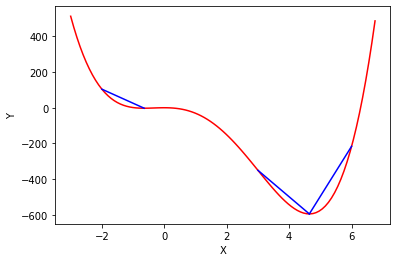

In [83]:
plt.plot(x_value, f_function(x_value), c='r')
plt.plot(np.array([6, 4.64572056]), np.array([f_function(6), f_function(4.64572056)]), c='b')
plt.plot(np.array([3, 4.64568186]), np.array([f_function(3), f_function(4.64568186)]), c='b')
plt.plot(np.array([-2,-0.64603101]), np.array([f_function(-2), f_function(-0.64603101)]), c='b')
plt.xlabel('X')
plt.ylabel('Y')

## Experiment 3: Gaussian Model

In [84]:
g_data = np.loadtxt('gaussdist.csv', delimiter=',')

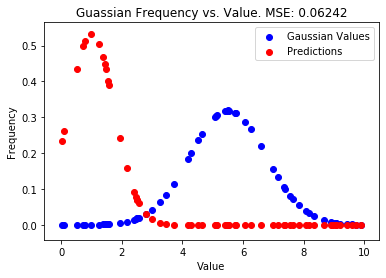

In [87]:
g_cost = GaussianCostFunction(g_data[:,0], g_data[:,1])
prediction = g_cost.predict(g_data[:,0], (1, .75))
cost = g_cost.cost((1, .75))
plt.scatter(g_data[:,0], g_data[:,1], color='b', label='Gaussian Values')
plt.scatter(g_data[:,0], prediction, color='r', label='Predictions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Guassian Frequency vs. Value. MSE: ' + str(round(cost, 5)))
plt.legend()

In [93]:
optimizer = Optimizer(1, 5000, .0001, .001)
optimized_p, iterations = optimizer.optimize(g_cost, np.array([1, .75]))
print("MU=1, Sigma=0.75\n" + "Found parameters such as: " + str(optimized_p[0]) + " " + "Sigma: " + str(optimized_p[1]) + " " + "with Iterations of: " + str(iterations) )

MU=1, Sigma=0.75
Found parameters such as: 5.490459061464256 Sigma: 1.250687698767924 with Iterations of: 3031


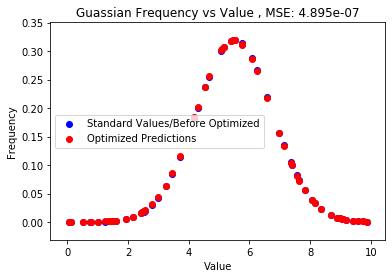

In [97]:
#plotting the best optimized parameters
predictions = g_cost.predict(g_data[:,0], (5.490459061464256,1.250687698767924))
cost = g_cost.cost((5.490459061464256,1.250687698767924))
plt.scatter(g_data[:,0], g_data[:,1], color='b', label='Standard Values/Before Optimized')
plt.scatter(g_data[:,0], predictions, color='r', label='Optimized Predictions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Guassian Frequency vs Value , MSE: " + str(round(cost, 10)))
plt.legend()